In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [19]:
res = pd.read_csv('res.csv')
df = pd.read_csv('df.csv')
df['Total'] = df['Total'] / 1000
df_wt = df[df.Line == 'nwg313']
df_c56s = df[df.Line == 'nwg373']
df_no_rnai = df[df.Condition == 'wt']
df_ph = df[df.Line == 'od58']

### ASI

Quite a lot of variation. For wt it looks like the polar body is contributing a lot, i.e. those with low ASI have polar body in view. Best solution might be to redo with higher n and exclude any with polar body

<IPython.core.display.Javascript object>


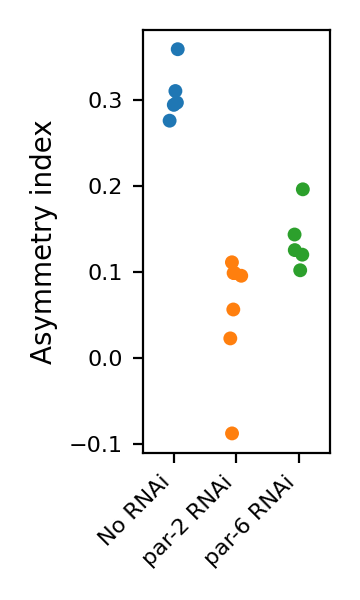

In [14]:
fig, ax = plt.subplots()
sns.stripplot(data=df_wt, x='Condition', y='ASI', order=['wt', 'par2', 'par6'], ax=ax)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xticklabels(['No RNAi', 'par-2 RNAi', 'par-6 RNAi'])
ax.set_xlabel('')
ax.set_ylabel('Asymmetry index')
fig.set_size_inches(1.8, 3)
plt.xticks(rotation=45, ha="right")
fig.tight_layout()
fig.savefig('Figs/asi_rnai.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


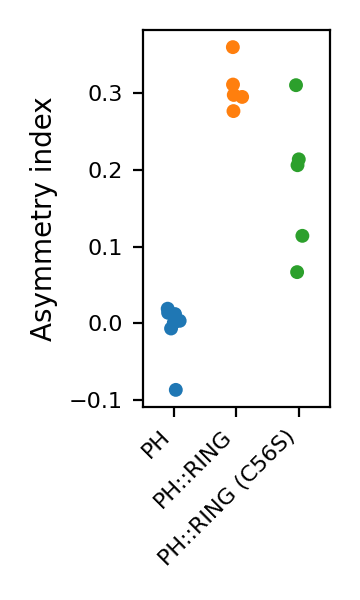

In [15]:
fig, ax = plt.subplots()
sns.stripplot(data=df_no_rnai.append(df_ph), x='Line', y='ASI', order=['od58', 'nwg313', 'nwg373'], ax=ax)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xticklabels(['PH', 'PH::RING', 'PH::RING (C56S)'])
ax.set_xlabel('')
ax.set_ylabel('Asymmetry index')
fig.set_size_inches(1.8, 3)
plt.xticks(rotation=45, ha="right")
fig.tight_layout()
fig.savefig('Figs/asi_wt_vs_c56s.png', dpi=600, transparent=True)

### Concentration profiles

In [5]:
def fold(array):
    return (array[:50][::-1] + array[50:]) / 2

def plot_profile(ax, df, c, cond, leg=None):
    if cond is not None:
        frames = df[df['Condition'] == cond]['Frame']
    else: 
        frames = df['Frame']
    mean_profile, std_profile = np.mean(profs[frames], axis=0), np.std(profs[frames], axis=0)
    ax.plot(mean_profile, c=c, label=leg)
#     [ax.plot(p, c=c, alpha=0.2) for p in profs[frames]]
    ax.fill_between(np.arange(len(mean_profile)), mean_profile - std_profile, mean_profile + std_profile, alpha=0.2, 
                    color=c, linewidth=0)
    
profs = res.groupby('Frame').apply(lambda x: x['Membrane signal'].to_numpy() / x['Cytoplasmic signal'].to_numpy())
# profs = res.groupby('Frame').apply(lambda x: x['Membrane signal'].to_numpy())
profs = np.array([fold(x) for x in profs])

<IPython.core.display.Javascript object>


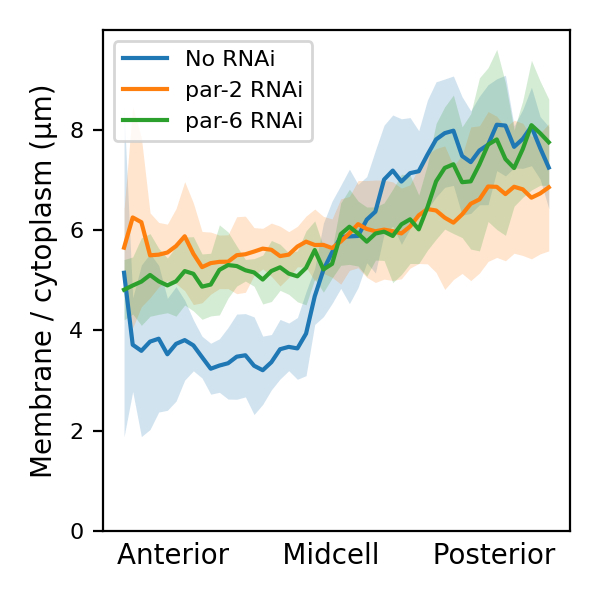

In [12]:
fig, ax = plt.subplots()
plot_profile(ax, df_wt, cond='wt', c='tab:blue', leg='No RNAi')
plot_profile(ax, df_wt, cond='par2', c='tab:orange', leg='par-2 RNAi')
plot_profile(ax, df_wt, cond='par6', c='tab:green', leg='par-6 RNAi')
ax.set_ylim(bottom=0)
ax.set_xlabel('Anterior      Midcell      Posterior')
ax.set_ylabel('Membrane / cytoplasm (μm)')
ax.set_xticks([])
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.legend(fontsize=8)
fig.set_size_inches(3,3)
fig.tight_layout()
fig.savefig('Figs/ratio_profile_rnai.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


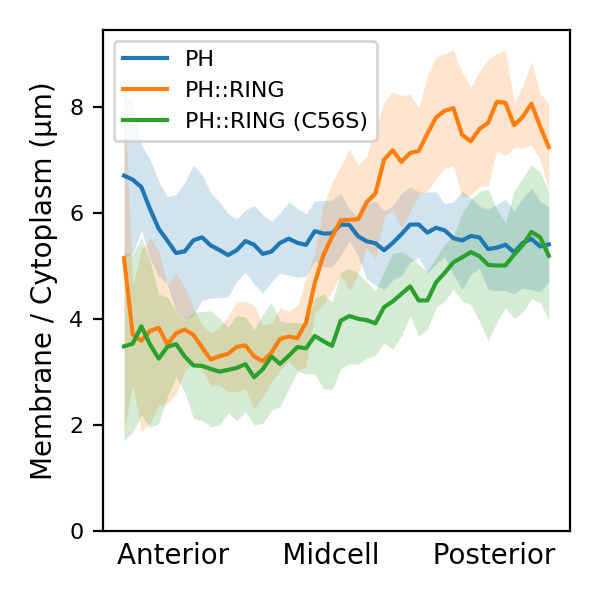

In [13]:
fig, ax = plt.subplots()
plot_profile(ax, df_ph, c='tab:blue', cond=None, leg='PH')
plot_profile(ax, df_wt, c='tab:orange', cond='wt', leg='PH::RING')
plot_profile(ax, df_c56s, c='tab:green', cond='wt',  leg='PH::RING (C56S)')
ax.set_ylim(bottom=0)
ax.set_xlabel('Anterior      Midcell      Posterior')
ax.set_ylabel('Membrane / Cytoplasm (μm)')
ax.set_xticks([])
# ax.set_ylim(0, 3.5)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.legend(fontsize=8)
fig.set_size_inches(3,3)
fig.tight_layout()
fig.savefig('Figs/ratio_profile_wt_vs_c56s.png', dpi=600, transparent=True)

### Dosages

<IPython.core.display.Javascript object>


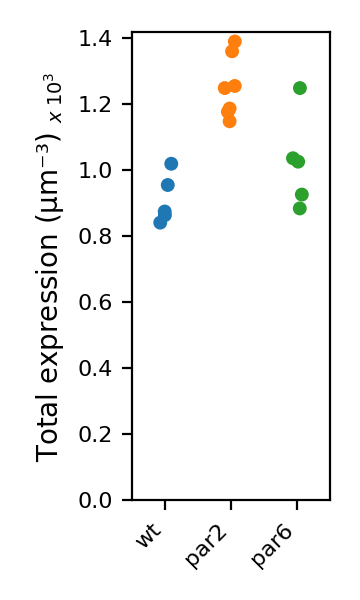

In [28]:
fig, ax = plt.subplots()
sns.stripplot(data=df_wt, x='Condition', y='Total', order=['wt', 'par2', 'par6'], ax=ax)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('')
ax.set_ylabel('Total expression (μm⁻³) ' + r'$_{x\;10^3}}$')
ax.set_ylim(bottom=0)
fig.set_size_inches(1.8, 3)
plt.xticks(rotation=45, ha="right")
fig.tight_layout()

<IPython.core.display.Javascript object>


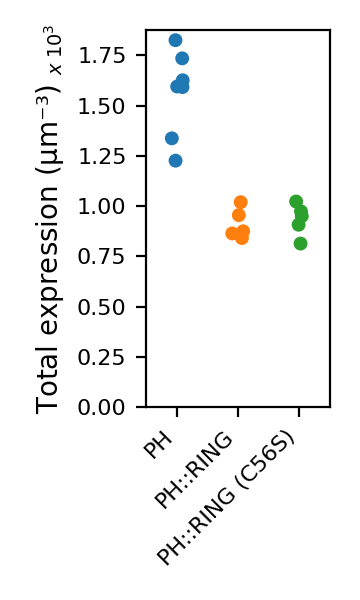

In [27]:
fig, ax = plt.subplots()
sns.stripplot(data=df_no_rnai.append(df_ph), x='Line', y='Total', order=['od58', 'nwg313', 'nwg373'], ax=ax)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xticklabels(['PH', 'PH::RING', 'PH::RING (C56S)'])
ax.set_xlabel('')
ax.set_ylabel('Total expression (μm⁻³) ' + r'$_{x\;10^3}}$')
ax.set_ylim(bottom=0)
fig.set_size_inches(1.8, 3)
plt.xticks(rotation=45, ha="right")
fig.tight_layout()
fig.savefig('Figs/dosages_wt_vs_c56s.png', dpi=600, transparent=True)

### Example images

<IPython.core.display.Javascript object>


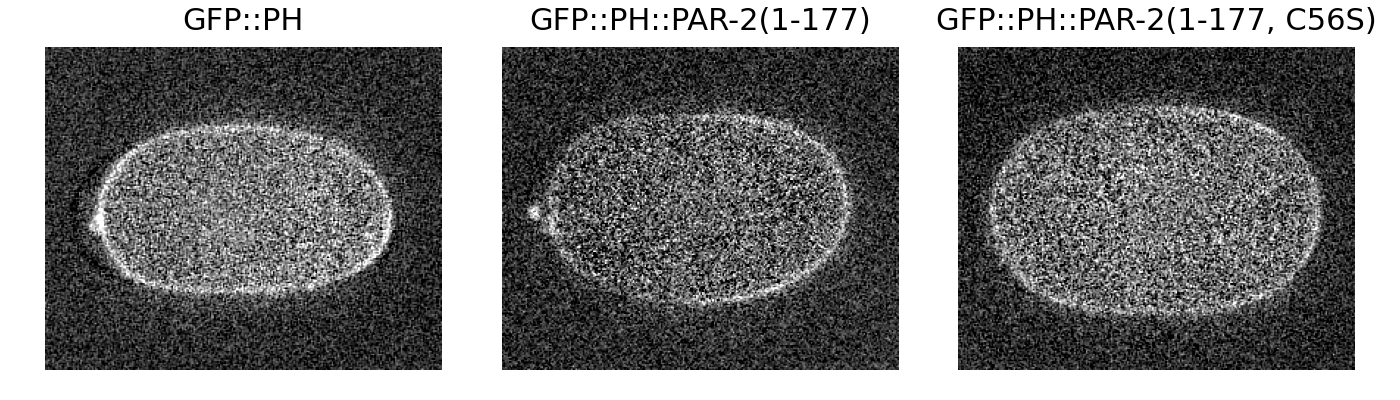

In [10]:
def func(path, ax, title):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI_fit.txt')
    rotated = rotated_embryo(img, roi, 270, 220, 3)
    ax.imshow(rotated, vmin=-200, vmax=2000, cmap='gray')
    ax.axis('off')
    ax.set_title(title, fontsize=11)
    
fig, ax = plt.subplots(1, 3)
func(df_ph.Path.iloc[3], ax[0], 'GFP::PH')
func(df_no_rnai[df_no_rnai.Line == 'nwg313'].Path.iloc[1], ax[1], 'GFP::PH::PAR-2(1-177)')
func(df_no_rnai[df_no_rnai.Line == 'nwg373'].Path.iloc[0], ax[2], 'GFP::PH::PAR-2(1-177, C56S)')
fig.set_size_inches(7, 2)
fig.tight_layout()
fig.savefig('Figs/imgs_wt_vs_c56s.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


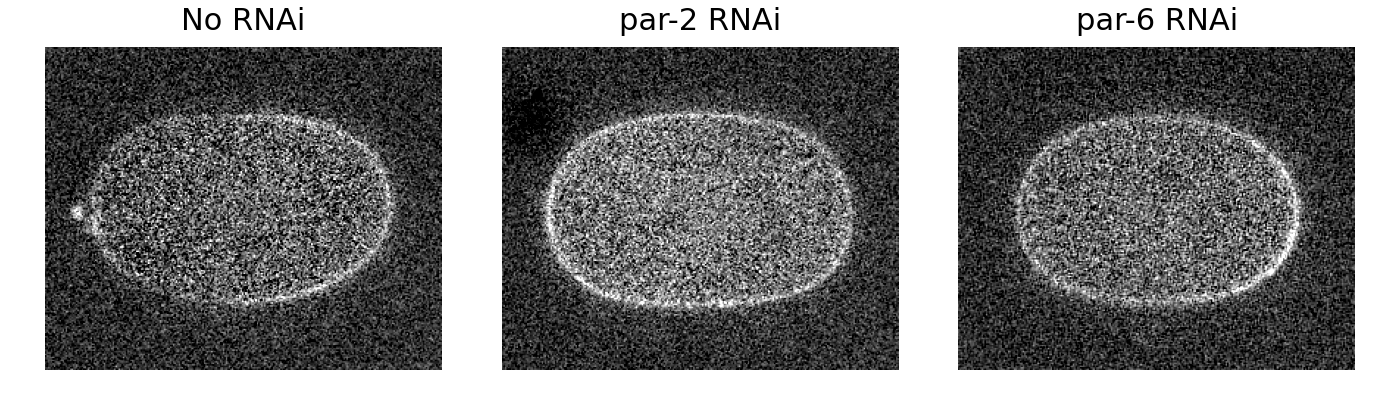

In [11]:
def func(path, ax, title):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI_fit.txt')
    rotated = rotated_embryo(img, roi, 270, 220, 3)
    ax.imshow(rotated, vmin=-200, vmax=2000, cmap='gray')
    ax.axis('off')
    ax.set_title(title, fontsize=11)
    
fig, ax = plt.subplots(1, 3)
func(df_wt[df_wt.Condition == 'wt'].Path.iloc[1], ax[0], 'No RNAi')
func(df_wt[df_wt.Condition == 'par2'].Path.iloc[2], ax[1], 'par-2 RNAi')
func(df_wt[df_wt.Condition == 'par6'].Path.iloc[2], ax[2], 'par-6 RNAi')
fig.set_size_inches(7, 2)
fig.tight_layout()
fig.savefig('Figs/imgs_rnai.png', dpi=600, transparent=True)